 # Activity intereset generation

## 1. Define probabilities

In [1]:
activity_probs <- list(
   "Single" = c(0.5, 0.4, 0.1),
   "Married" = c(0.3, 0.5, 0.2),
   "Divorced" = c(0.15, 0.6, 0.25),
   "Widowed" = c(0.1, 0.4, 0.5)
)
activities <- c("Trading Cards","Dachshunds","Brass Animals")

## 2. Generate activity interest

In [2]:
generate_activity <- function(status) {
  activity <- sample(activities, size=1, replace = TRUE, prob=unlist(activity_probs[status]))
  return(activity)
}

In [7]:
temp_data <- read.csv("../workingsets/temp_age_gender_status_salary_bank.csv", header=TRUE)

status <- temp_data$status

new_activities <- lapply(seq_len(length(status)), function(i) {
  generate_activity(status[i])
})

new_ages_genders_statuses_banks_activites <- data.frame(age = temp_data$age, gender = temp_data$gender, status = temp_data$status, salary = temp_data$salary, bank = temp_data$bank, activity = unlist(new_activities))

## 3. Plot activity repartition

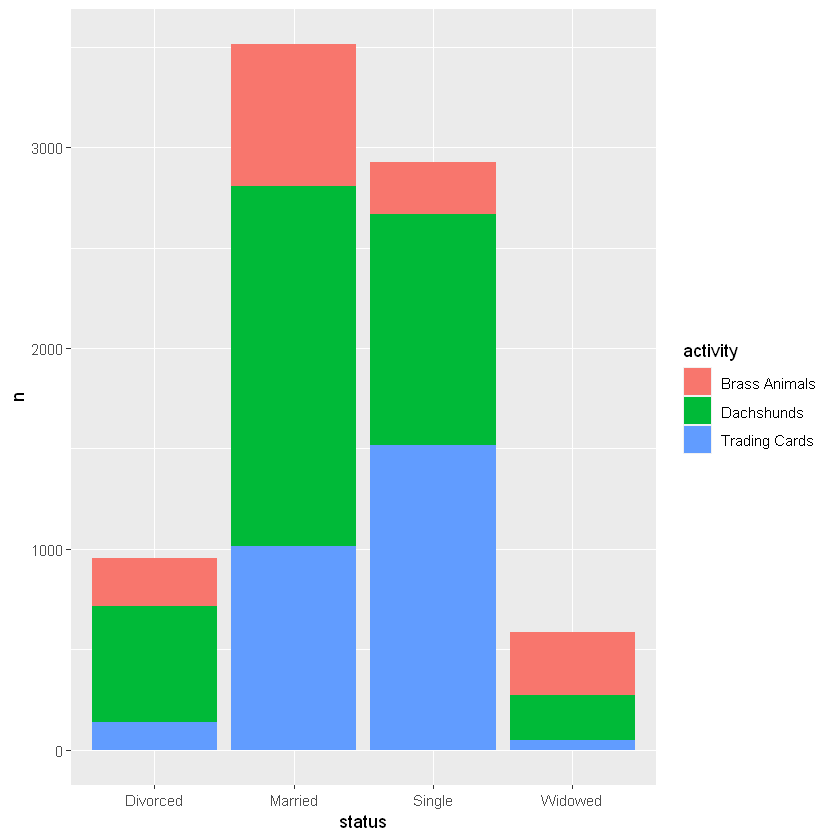

In [8]:
library(ggplot2)
library(dplyr)
new_ages_genders_statuses_banks_activites$activity <- as.character(new_ages_genders_statuses_banks_activites$activity)
counts <- new_ages_genders_statuses_banks_activites %>% count(status, activity)
ggplot(counts, aes(x = status, y = n, fill = activity)) + geom_col()

## 4. Export generated data

In [9]:
write.csv(new_ages_genders_statuses_banks_activites, file = "../workingsets/temp_age_gender_status_salary_bank_activity.csv")